# Trabajo práctico integrador.

## Análisis de datos.

### Datos de distintas canciones en Spotify

### Análisis exploratorio inicial

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set color palette
color = ['#1ED760', '#FAF5F5']
sns.set_palette(sns.color_palette(color))

In [3]:
# Load dataset from GitHub repository
df = pd.read_csv('https://raw.githubusercontent.com/ldidone/analisis_de_datos_CEIA_TP/main/data/data_playlist.csv')

In [4]:
# Show first 10 rows
df.head(10)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.524,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.597,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.452,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.748,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.913,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1


In [5]:
# Define numeric vars
numeric = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']
useful_statistics = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
five_statistics = ['min', '25%', '50%', '75%', 'max']

In [6]:
# General description of each numeric var
df[numeric].describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,0.594188,0.100245,0.203376,-8.509339,0.098966,0.497321
std,0.338405,0.172036,0.253301,0.259921,0.177609,5.039488,0.104715,0.239615
min,0.000001,0.107000,0.009250,0.000000,0.024000,-29.601000,0.023400,0.033200
25%,0.037150,0.480000,0.423250,0.000000,0.094550,-10.173500,0.035900,0.297000
50%,0.244500,0.606000,0.631500,0.000010,0.129000,-7.270000,0.048750,0.483000
75%,0.678500,0.715750,0.804750,0.002245,0.264750,-5.097750,0.113000,0.684500
max,0.994000,0.986000,0.995000,0.967000,0.979000,-0.533000,0.721000,0.975000


In [7]:
# Describe dataset 5 numeric statistics
df[numeric].describe().loc[five_statistics]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence
min,0.000001,0.10700,0.00925,0.000000,0.02400,-29.60100,0.02340,0.0332
25%,0.037150,0.48000,0.42325,0.000000,0.09455,-10.17350,0.03590,0.2970
50%,0.244500,0.60600,0.63150,0.000010,0.12900,-7.27000,0.04875,0.4830
75%,0.678500,0.71575,0.80475,0.002245,0.26475,-5.09775,0.11300,0.6845
max,0.994000,0.98600,0.99500,0.967000,0.97900,-0.53300,0.72100,0.9750


In [8]:
# Identify datatypes
df.dtypes

acousticness        float64
danceability        float64
duration              int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
label                 int64
dtype: object

### Descripción de las variables.
Se identifican los tipos de datos de las variables. Además se clasifican en variables de entrada y de salida.

| Variable         | Tipo de dato        | Descripción                                                                                  | ¿Es informativa para un problema de clasificación? | Entrada o salida |
|------------------|---------------------|----------------------------------------------------------------------------------------------|----------------------------------------------------|------------------|
| acousticness     | Numérico (ordinal). | Indica el grado de acusticidad de una canción.                                               | Sí                                                | Entrada          |
| danceability     | Numérico (ordinal). | Indica que tan bailable es una canción.                                                      | Sí                                                 | Entrada          |
| energy           | Numérico (ordinal). | Indica el nivel de energía de una canción.                                                   | Sí                                                 | Entrada          |
| instrumentalness | Numérico (ordinal). | Indica qué tan instrumental es una canción.                                                  | Sí                                                 | Entrada          |
| key              | Categórico.         | Indica la tonalidad en la que se encuentra la canción.                                       | Sí (One Hot Enconding)                                                 | Entrada          |
| liveness         | Numérico (ordinal). | Indica qué tan "en vivo" es la canción.                                                      | Sí                                                 | Entrada          |
| loudness         | Numérico (ordinal). | Indica el volumen general de una pista en decibelios (dB)                                    | Sí                                                 | Entrada          |
| mode             | Categórico.         | Indica la modalidad (mayor o menor) de una canción. Contenido melódico.                      | Sí (One Hot Enconding).                                                | Entrada          |
| speechiness      | Numérico (ordinal). | Indica la proporción de discurso que hay en la canción.                                      | Sí                                                 | Entrada          |
| tempo            | Categórico. | El tempo general estimado de una pista en pulsaciones por minuto (BPM).                      | Sí (One Hot Enconding)                                                 | Entrada          |
| time_signature   | Categórico.         | El compás es una convención de notación para especificar cuántos tiempos hay en cada compás. | Sí (One Hot Enconding)                                                | Entrada          |
| valence          | Numérico (ordinal)  | Describe la positividad musical que transmite una canción.                                   | Sí                                                 | Entrada          |
| label            | Categórico.         | Indica si la canción es del gusto de la persona que tiene esta playlist activa               | No (ya que es la variable de salida)               | Salida           |

### Referencia:
- [Enlace de interés](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-analysis)

### Análisis de las Variables de entrada

### Análisis de variables numéricas

#### Skewness (asimetría)

In [9]:
df[numeric].skew()

acousticness        0.534804
danceability       -0.311981
energy             -0.458765
instrumentalness    2.488166
liveness            2.156240
loudness           -1.693115
speechiness         2.040370
valence             0.104812
dtype: float64

#### Kurt (cutosis)

In [10]:
df[numeric].kurt(numeric_only=True)

acousticness       -1.210296
danceability       -0.296706
energy             -0.758962
instrumentalness    4.518012
liveness            4.842701
loudness            3.232917
speechiness         4.149336
valence            -0.911007
dtype: float64

#### 1. acousticness

In [11]:
df.acousticness.describe().loc[useful_statistics].to_frame()

,acousticness
mean,0.357394
std,0.338405
min,0.000001
25%,0.037150
50%,0.244500
75%,0.678500
max,0.994000


<AxesSubplot:xlabel='acousticness', ylabel='Count'>

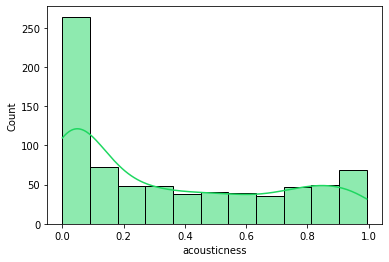

In [12]:
sns.histplot(df['acousticness'], kde=True)

c:\users\lucas\documents\especialización en inteligencia artificial de la uba\4. análisis de datos\repositorio propio\analisis_de_datos_ceia_tp\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acousticness', ylabel='Density'>

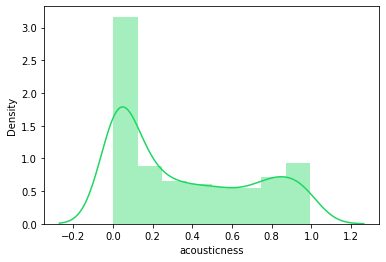

In [13]:
sns.distplot(df['acousticness'])

#### 2. danceability

In [14]:
df.danceability.describe().loc[useful_statistics].to_frame()

,danceability
mean,0.596439
std,0.172036
min,0.107000
25%,0.480000
50%,0.606000
75%,0.715750
max,0.986000


<AxesSubplot:xlabel='danceability', ylabel='Count'>

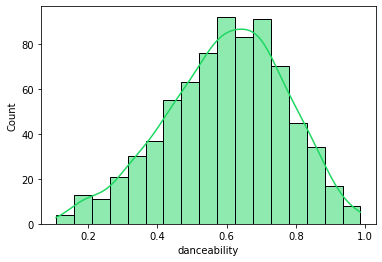

In [15]:
sns.histplot(df['danceability'], kde=True)

#### 3. energy

In [16]:
df.energy.describe().loc[useful_statistics].to_frame()

,energy
mean,0.594188
std,0.253301
min,0.009250
25%,0.423250
50%,0.631500
75%,0.804750
max,0.995000


<AxesSubplot:xlabel='energy', ylabel='Count'>

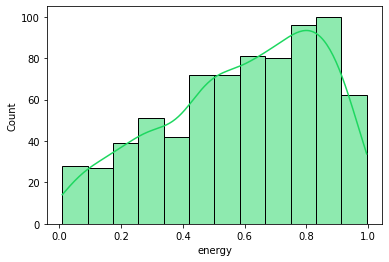

In [17]:
sns.histplot(df['energy'], kde=True)

#### 4. instrumentalness

In [18]:
df.instrumentalness.describe().loc[useful_statistics].to_frame()

,instrumentalness
mean,0.100245
std,0.259921
min,0.000000
25%,0.000000
50%,0.000010
75%,0.002245
max,0.967000


c:\users\lucas\documents\especialización en inteligencia artificial de la uba\4. análisis de datos\repositorio propio\analisis_de_datos_ceia_tp\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='instrumentalness', ylabel='Density'>

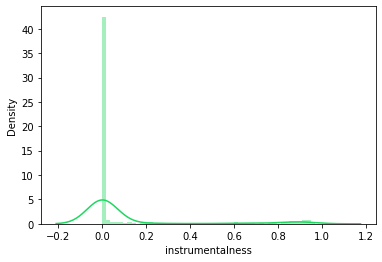

In [19]:
sns.distplot(df['instrumentalness'])

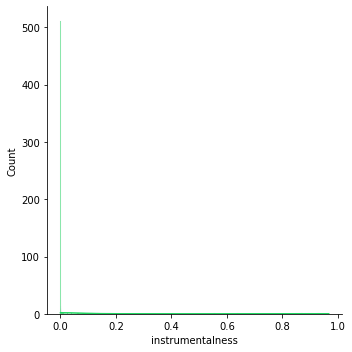

In [20]:
sns.displot(df['instrumentalness'], kde=True)

#### 5. liveness

In [21]:
df.liveness.describe().loc[useful_statistics].to_frame()

,liveness
mean,0.203376
std,0.177609
min,0.024000
25%,0.094550
50%,0.129000
75%,0.264750
max,0.979000


<AxesSubplot:xlabel='liveness', ylabel='Count'>

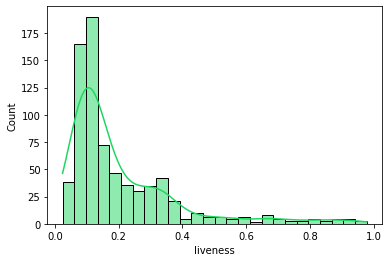

In [22]:
sns.histplot(df['liveness'], kde=True)

#### 6. loudness

In [23]:
df.loudness.describe().loc[useful_statistics].to_frame()

,loudness
mean,-8.509339
std,5.039488
min,-29.601000
25%,-10.173500
50%,-7.270000
75%,-5.097750
max,-0.533000


<AxesSubplot:xlabel='loudness', ylabel='Count'>

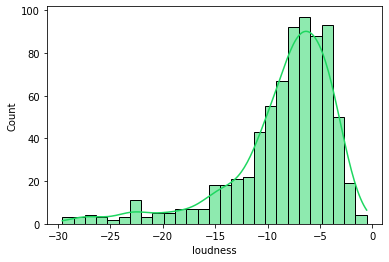

In [24]:
sns.histplot(df['loudness'], kde=True)

#### 7. speechiness

In [25]:
df.speechiness.describe().loc[useful_statistics].to_frame()

,speechiness
mean,0.098966
std,0.104715
min,0.023400
25%,0.035900
50%,0.048750
75%,0.113000
max,0.721000


<AxesSubplot:xlabel='speechiness', ylabel='Count'>

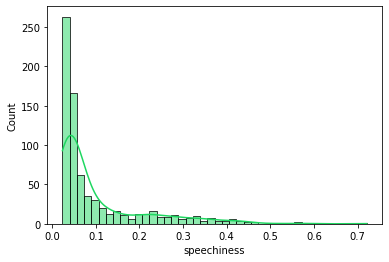

In [26]:
sns.histplot(df['speechiness'], kde=True)

#### 8. valence

In [27]:
df.valence.describe().loc[useful_statistics].to_frame()

,valence
mean,0.497321
std,0.239615
min,0.033200
25%,0.297000
50%,0.483000
75%,0.684500
max,0.975000


<AxesSubplot:xlabel='valence', ylabel='Count'>

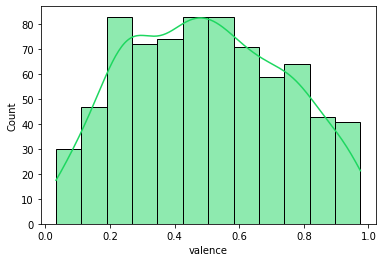

In [28]:
sns.histplot(df['valence'], kde=True)

### Conclusiones:
A excepción de las columnas "acousticness", la aproximación de las features del dataset de Spotify a una variable normal es correcta (en el caso de "acousticness", se podría aproximar a 2 normales).  

En cuanto a la curtosis de las features, las columnas duration,instrumentalness, liveness, loudness, speechiness y time_signature presentan distribuciones leptocúrticas (mayor concentración alrededor de la media), mientras que las restantes features presentan una distribución platicúrtica.

Con respecto a la oblicuidad de las features o "skewness", se consideran bastante simétricas: ‘acousticness’, danceability, energy, key, tempo y valence, mientras que las restantes features, se consideran considerablemente asimétricas.

### Análisis de variables categóricas

#### 1. key

In [29]:
# Cantidad de elementos de cada categoría
pd.value_counts(df['key']).sort_values(ignore_index=True).to_frame() 

,key
0,17
1,44
2,46
3,48
4,48
5,51
6,63
7,69
8,74
9,85


In [30]:
# Frecuencia relativa de cada categoría
pd.value_counts(df['key'], normalize=True).sort_values(ignore_index=True).to_frame() 

,key
0,0.022667
1,0.058667
2,0.061333
3,0.064000
4,0.064000
5,0.068000
6,0.084000
7,0.092000
8,0.098667
9,0.113333


<AxesSubplot:title={'center':'key'}>

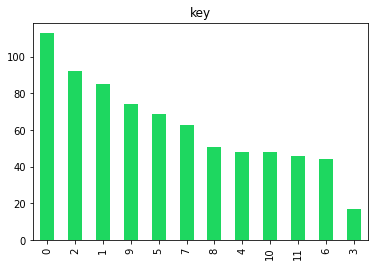

In [31]:
pd.value_counts(df['key']).plot.bar(title='key')

#### 2. mode

In [32]:
# Cantidad de elementos de cada categoría
pd.value_counts(df['mode']).sort_values(ignore_index=True).to_frame() 

,mode
0,194
1,556


In [33]:
# Cantidad de elementos de cada categoría
pd.value_counts(df['mode'], normalize=True).sort_values(ignore_index=True).to_frame() 

,mode
0,0.258667
1,0.741333


<AxesSubplot:title={'center':'mode'}>

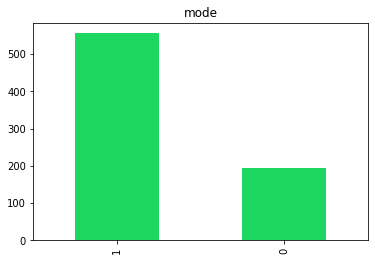

In [34]:
pd.value_counts(df['mode']).plot.bar(title='mode')

#### 3. tempo

In [35]:
# Cantidad de elementos de cada categoría (agrupados)
pd.value_counts(df['tempo'], bins=10).sort_values(ignore_index=True).to_frame() 

,tempo
0,8
1,14
2,23
3,47
4,61
5,73
6,116
7,121
8,123
9,164


In [36]:
# Cantidad de elementos de cada categoría agrupada
pd.value_counts(df['tempo'], bins=10, normalize=True).sort_values(ignore_index=True).to_frame()

,tempo
0,0.010667
1,0.018667
2,0.030667
3,0.062667
4,0.081333
5,0.097333
6,0.154667
7,0.161333
8,0.164000
9,0.218667


<AxesSubplot:title={'center':'tempo'}>

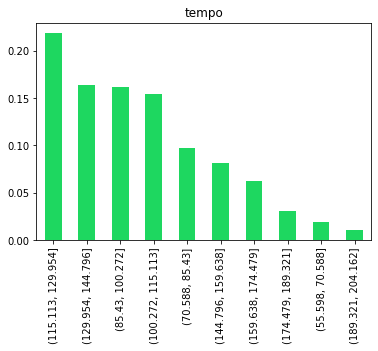

In [37]:
pd.value_counts(df['tempo'], bins=10, normalize=True).plot.bar(title='tempo')

#### 4. time_signature

In [38]:
pd.value_counts(df['time_signature']).sort_values(ignore_index=True).to_frame() 

,time_signature
0,6
1,9
2,64
3,671


In [39]:
pd.value_counts(df['time_signature'], normalize=True).sort_values(ignore_index=True).to_frame() 

,time_signature
0,0.008000
1,0.012000
2,0.085333
3,0.894667


<AxesSubplot:title={'center':'time_signature'}>

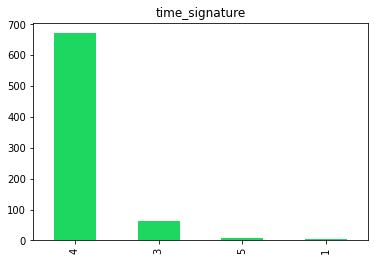

In [40]:
pd.value_counts(df['time_signature']).plot.bar(title='time_signature')

**En lo referente a las features con variables categóricas, las features "time_signature" (tipo de compás) y "mode" (modos de un tono: mayor o menor), son las de menor número de variables categóricas. La feature "key" (tono), es la de mayor cantidad número de variables.**

- No se evidencian variables compuestas

### Análisis de las variable de salida

In [41]:
pd.value_counts(df['label'], normalize=True).sort_values(ignore_index=True).to_frame() 

,label
0,0.397333
1,0.602667


<AxesSubplot:ylabel='label'>

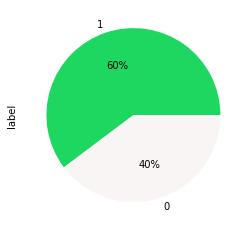

In [42]:
df.label.value_counts().plot.pie(autopct='%1.0f%%', figsize=(4,4))

-  La variable de salida "label" (like o no de una canción) se encuentra levemente desbalanceada en favor de la clase 1 (es decir la clase que indica que al usuario le gustó la canción).

## 3. Limpieza y preparación de datos / Ingeniería de features

### Análisis de datos faltantes

In [43]:
df.isnull().sum().to_frame()

,0
acousticness,0
danceability,0
duration,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0
speechiness,0


- No se evidencia la presencia de valores faltantes o nulos.